<img src='./pic/sharif-main-logo.png' alt="SUT logo" width=300 height=300 align=left class="saturate" > <br>

<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024 <br>
<font color=3C99D size=5>
    Practical Assignment 1 - Supervised Learning <br>
<font color=696880 size=4>
    Erfan Salima, Nikan Vasei, Fatemeh Shiri, Sarina Heshmati

____

# Personal Data

In [1]:
student_number = '401106339'
Name = 'Ali'
Last_Name = 'Ghasemzadeh' 

# Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Polynomial Regression & Bias-Variance Tradeoff (100 Points)

<font size=4>
Author: Nikan Vasei

## Introduction
In this part, we will explore the **bias-variance tradeoff** using polynomial regression models. Polynomial regression allows us to model complex relationships between an independent variable $X$ and a dependent variable $y$ by introducing higher-degree polynomial terms. However, increasing the complexity of the model can lead to **overfitting** or **underfitting**, which are key concepts in the bias-variance tradeoff.

## Plan
1. **Create a synthetic dataset**: Use the provided quadratic function to generate $X$ and $y$ with noise.
2. **Split the dataset**: Divide the data into training and test sets to evaluate model generalization.
3. **Train polynomial models**: Fit polynomial regression models with degrees ranging from 1 to 10 (or more).
4. **Evaluate performance**: Calculate the MSE for both training and test sets and compare the errors for different polynomial degrees.
5. **Analyze the results**: Use plots to visualize how the error on the training and test sets changes as the model complexity increases.

## Objective
The objective is to determine the degree of the polynomial that best models the relationship between $X$ and $y$ and balances both underfitting and overfitting, i.e., the degree that achieves the best generalization.

## 1. Create a synthetic dataset (15 Points)

Your first task is to define a function that generates a dataset with 1000 samples. The input values for the independent variable $X$ should be randomly selected within the range of **-3 to 3**. To make the dataset more realistic, add noise to the output using a normal distribution with a mean of 0 and a standard deviation of 10.

The relationship between the independent variable $X$ and the dependent variable $y$ is modeled by the following equation:

$$
y = 0.2X^6 - 0.5X^5 + 2X^4 - 5X^3 + 3X^2 - 10X + 5 + \text{noise}
$$

In [3]:
def generate_dataset(range_start, range_end, num_samples=1000, noise_std=10.0):
    mu = 0
    X = np.linspace(range_start, range_end, num_samples)
    Y = 0.2*(X**6) - 0.5*(X**5) + 2*(X**4) - 5*(X**3) + 3*(X**2) -10*X + 5
    noise = np.random.normal(mu, noise_std, X.shape)
    Y = Y + noise
    return X, Y

Use a scatter plot to visualize the relationship between $X$ and $y$. This will help you understand the structure of the generated data before moving on to fitting models.

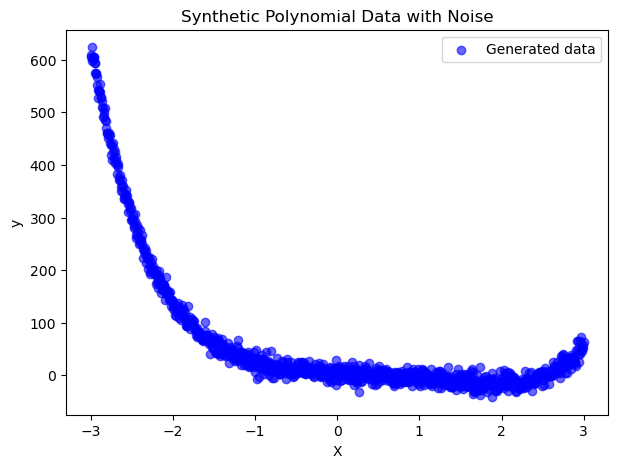

In [4]:
X, y = generate_dataset(-3, 3)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Generated data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Polynomial Data with Noise')
plt.legend()
plt.show()

## 2. Splitting the Dataset (5 Points)

In this task, you should split the dataset into three parts:
1. **Training Set**
2. **In-Range Test Set**: This set should contain data within the same range as the training set.
3. **Out-of-Range Test Set**: This set should contain data in the range **[5, 7]**.

Ensure that the two test sets (In-Range and Out-of-Range) have the same length. You can use the `train_test_split` function from the `sklearn` library for convenience in splitting the data.

In [5]:
X_train, X_in_range_test, y_train, y_in_range_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_points_out_of_range = len(X_in_range_test)
X_out_of_range, y_out_of_range = generate_dataset(5, 7, num_samples = 200)

Again, you can use a scatter plot (or similar plots) to visualize the different sets and see their overall distributions.

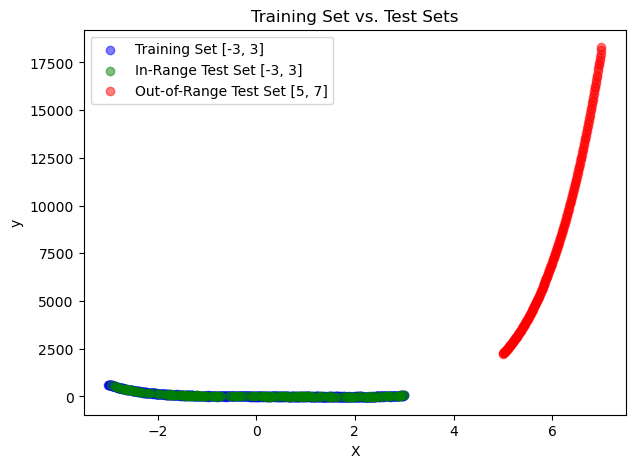

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Set [-3, 3]')
plt.scatter(X_in_range_test, y_in_range_test, color='green', alpha=0.5, label='In-Range Test Set [-3, 3]')
plt.scatter(X_out_of_range, y_out_of_range, color='red', alpha=0.5, label='Out-of-Range Test Set [5, 7]')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training Set vs. Test Sets')
plt.legend()
plt.show()

## 3. Polynomial Regression Training (25 Points)

In this task, you should train polynomial regression models with varying degrees, ranging from degree = 2 to degree = 9. You can use the `preprocessing`, `linear_model`, and `pipeline` classes from the `sklearn` library to create and evaluate these models.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def train_models(X, y, degree):       
    model1 = Pipeline([
        ('poly_features', PolynomialFeatures(degree)),
        ('linear_regression', LinearRegression())
    ])
    model1.fit(X.reshape(-1, 1), y)
    return model1

In [8]:
models = {}
degree = 9

for i in range(2, degree+1):
    models[i] = train_models(X_train, y_train, i)

## 4. Model Evaluation (20 Points)

In this task, you should evaluate the polynomial regression models on both test sets (In-Range Test Set and Out-of-Range Test Set) using Mean Squared Error (MSE). This evaluation will help you understand how well each model generalizes to different data ranges.

For each polynomial degree, compute the MSE on both the in-range test set and the out-of-range test set using the `mean_squared_error` function from the `sklearn` library.

In [9]:
def evaluate_models(models, X_test, y_test):
    losses = {}
    
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    
    return losses

In [10]:
mse_losses = evaluate_models(models, X_train, y_train)
for degree, mse in mse_losses.items():
    print(f"train set Degree {degree}: MSE = {mse}")

mse_losses_test_in = evaluate_models(models, X_in_range_test, y_in_range_test)
for degree, mse in mse_losses_test_in.items():
    print(f"in range test set Degree {degree}: MSE = {mse}")

mse_losses_test_out = evaluate_models(models, X_out_of_range, y_out_of_range)
for degree, mse in mse_losses_test_out.items():
    print(f"out of range test set Degree {degree}: MSE = {mse}")

train set Degree 2: MSE = 2674.821742667482
train set Degree 3: MSE = 935.9354012219504
train set Degree 4: MSE = 129.7883059403272
train set Degree 5: MSE = 110.38983659275026
train set Degree 6: MSE = 100.94232093717591
train set Degree 7: MSE = 100.90974160455545
train set Degree 8: MSE = 100.86771380009628
train set Degree 9: MSE = 100.85018053705636
in range test set Degree 2: MSE = 2226.3567514206457
in range test set Degree 3: MSE = 794.7283860187675
in range test set Degree 4: MSE = 139.1907197959838
in range test set Degree 5: MSE = 123.37159993786813
in range test set Degree 6: MSE = 107.12204485304196
in range test set Degree 7: MSE = 107.13688280598556
in range test set Degree 8: MSE = 107.20158247119498
in range test set Degree 9: MSE = 107.1341738218172
out of range test set Degree 2: MSE = 73345431.77053745
out of range test set Degree 3: MSE = 111508051.4766417
out of range test set Degree 4: MSE = 27168825.88897232
out of range test set Degree 5: MSE = 74535066.6722779

## 5. Analyzing Model Scores (20 Points)

In this task, you will visualize and analyze the performance of polynomial regression models by plotting the **logarithm** (to better visualize differences) of losses (Mean Squared Error, MSE) for both training and test set and also by printing the losses related to each degree.

Make sure to train each model a few times to get a sense of variability in the results.

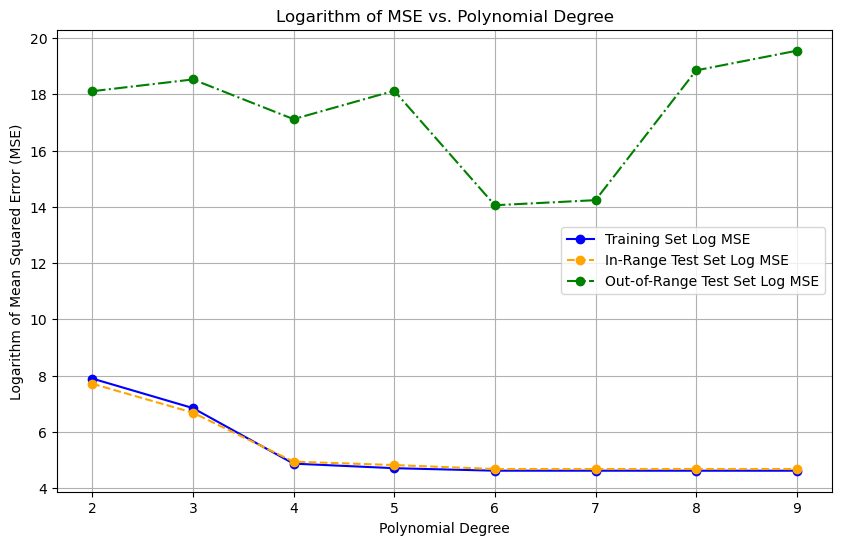

In [11]:
# TODO: Calculate the log MSE for both the train and the test sets based on the model degrees from 2 to 9
mse_losses_log = [np.log(loss) for deg, loss in mse_losses.items()]
mse_losses_test_in_log = [np.log(loss) for deg, loss in mse_losses_test_in.items()]
mse_losses_test_out_log = [np.log(loss) for deg, loss in mse_losses_test_out.items()]
# TODO: Plot the log MSE results
plt.figure(figsize=(10, 6))
degrees = [i for i in range(2, degree+1)]
plt.plot(degrees, mse_losses_log, label='Training Set Log MSE', marker='o', color='b')
plt.plot(degrees, mse_losses_test_in_log, label='In-Range Test Set Log MSE', marker='o', linestyle='--', color='orange')
plt.plot(degrees, mse_losses_test_out_log, label='Out-of-Range Test Set Log MSE', marker='o', linestyle='-.', color='g')

plt.xlabel('Polynomial Degree')
plt.ylabel('Logarithm of Mean Squared Error (MSE)')
plt.title('Logarithm of MSE vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# TODO: Print each model loss on the training and the two test sets
from tabulate import tabulate
table = zip(degrees, mse_losses_log, mse_losses_test_in_log, mse_losses_test_out_log)
print(tabulate(table, headers=["Degree", "Train MSE", "In-Range Test MSE", "Out-of-Range Test MSE"], floatfmt=".2f"))

  Degree    Train MSE    In-Range Test MSE    Out-of-Range Test MSE
--------  -----------  -------------------  -----------------------
       2         7.89                 7.71                    18.11
       3         6.84                 6.68                    18.53
       4         4.87                 4.94                    17.12
       5         4.70                 4.82                    18.13
       6         4.61                 4.67                    14.06
       7         4.61                 4.67                    14.24
       8         4.61                 4.67                    18.85
       9         4.61                 4.67                    19.55


## Conclusion (15 Points)

1. Based on your analysis of the training set loss, in-range test set loss, and out-of-range test set loss across different polynomial degrees, summarize what you have learned about the bias-variance tradeoff. How do these losses illustrate the tradeoff between model complexity and performance?

- <span style="color:cyan;">**Answer:** 
 یه مدل با پیچیدگی کم یا به عبارتی در این مثال درجه ی چند جمله ای کم بایاس زیادی دارد و واریانس کم و یه مدل با پیچیدگی زیاد یا به عبارتی درجه ی چند جمله ای زیاد بایس کمی دارد ولی واریانس زیادی دارد 
 در واقع وقتی درجه چند جمله ای را زیاد کنیم بهترین حالت مدل بهتر می تواند تابع هدف را مدل کند یعنی فاصله ی بهترین حالت فضای فرضیه 
 تا تابع هدف کم است یعنی بایاس کم ولی از طرفی چون فضای فرضیه را بزرگ کرده ایم واریانس مان بزرگتر می شود
 حالا اگر درجه چند جمله ای را کم در نظر بگیریم چون فضای فرضیه مان کوچک شده بهترین حالت آن
 نسبت به تابع هدف تخمین بدتری نسبت به حالت قبلی است و یعنی بایاس زیادی داریم 
 ولی در عوض چون فضای فرضیه را کوچک کرده ایم واریانس مان کوچکتر می شود.
 بنابراین یک trade-off ای بین بایاس و واریانس داریم.
 </span>

2. Reflecting on the trends observed in the losses as polynomial degree increases, what conclusions can you draw about the effects of model complexity on overfitting and underfitting? How does this understanding help in selecting the appropriate polynomial degree for a model?

- <span style="color:cyan;">**Answer:**
اگه درجه ی مدل را خیلی پیچیده کنیم و دیتای ما کم باشد اورفیتینگ اتفاق می افتد و باعث می شود عملکرد خوبی روی دیتای ترین داشته باشیم و عملکرد بدی روی دیتای تست داشته باشیم
اگر هم مدل را خیلی ساده بگیریم اندرفیتینگ اتفاق می افتد و به عبارتی دیتای ما خوب یادگیری نمی شود.
  </span>

# Regularization (50 Points)

<font size=4>
Author: Fatemeh Shiri

# **Introduction**

In this part, you will work with a real dataset that includes information about the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. <a ref= 'https://github.com/stedy/Machine-Learning-with-R-datasets'>Reference</a>

Columns available:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

# Plan

- First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

- Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. 

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe

In [13]:
file_path = "./InsuranceData.csv"
df = pd.read_csv(file_path)
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Get a brief description and do some EDA to get familiar with the dataset

In [14]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

# Preprocessing

In [15]:
# TODO: apply any pre processing method you think is necessary
# Options: Normalization, Standardization, Outlier Detection, Imputation, Encoding, etc.
def get_XY(df, have_charges=True):
    for group in ['sex', 'smoker', 'region']:
        label_encoder = LabelEncoder()
        df[group] = label_encoder.fit_transform(df[group])

    standard_cols = ['age', 'children', 'bmi']
    scaler = StandardScaler()
    df[standard_cols] = scaler.fit_transform(df[standard_cols])
    if have_charges:
        X = df.drop("charges", axis=1)
        y = df['charges']
        return X, y
    return df

In [16]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
X, y = get_XY(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

,age,sex,bmi,children,smoker,region
560,0.483668,0,-1.757474,0.751079,0,1
1285,0.554869,0,-1.040599,-0.908614,0,0
1142,0.910875,0,-0.952015,-0.908614,0,2
969,-0.014740,0,0.599846,3.240619,0,2
486,1.053277,0,-1.508126,1.580926,0,1
...,...,...,...,...,...,...
1095,-1.509965,0,0.112633,2.410772,0,0
1130,-0.014740,0,-1.114419,3.240619,0,2
1294,1.338082,1,-0.900341,-0.908614,0,0
860,-0.157143,0,2.778356,0.751079,1,3


# Training

Fit a linear regressor to the data.

In [18]:
# TODO: Use sklearn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

In [19]:
lr_model.coef_

array([ 3.61028043e+03, -1.87914567e+01,  2.04689296e+03,  5.12253132e+02,
        2.36478181e+04, -2.71284266e+02])

# Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [20]:
# TODO: Use Lasso from sklearn library
ls_model = Lasso(alpha=0.5)
ls_model.fit(X_train, y_train)
print(ls_model.coef_)

[ 3.60983084e+03 -1.65552917e+01  2.04631841e+03  5.11790814e+02
  2.36445283e+04 -2.70790182e+02]


L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [21]:
# TODO: Use Ridge from sklearn library
rg_model = Ridge(alpha=2)
rg_model.fit(X_train, y_train)
print(rg_model.coef_)

[ 3.59823554e+03 -3.40567263e+00  2.04391495e+03  5.13413200e+02
  2.33773282e+04 -2.71101143e+02]


Test different regularization parameters (alpha) for each regularization method using cross validation and visualize the coefficients of the variables. Use MAPE for evaluation.

**Mean Absolute Percentage Error (MAPE)**:


 is a widely used metric for evaluating the accuracy of forecasting models. It quantifies the prediction error as a percentage, providing an intuitive measure of how far off predictions are from actual values. MAPE is defined as the average of the absolute percentage errors between predicted values and actual values. The formula for calculating MAPE is:

$$
\text{MAPE} = \frac{100}{N} \sum_{t=1}^{N} \left| \frac{A_t - F_t}{A_t} \right|
$$
    
Where:
- $N$ is the number of observations,
- $A_t$ is the actual value,
- $F_t$ is the forecasted value.

In [22]:
# # TODO: Use folding methods and mape from sklearn library
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
def get_cross(model, X, y, cv=5):
    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
    return -cross_val_score(model, X, y, scoring= mape_scorer, cv=cv).mean()

ls_mape = get_cross(ls_model, X, y)
rg_mape = get_cross(rg_model, X, y)
print(ls_mape)
print(rg_mape)

0.42568766352238513
0.42896430576402134


Add extra variables to dataset to make model more complex, then compare the results. 

In [23]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn 
poly_features = PolynomialFeatures(degree=4)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [24]:
def mape_func(model, X, y):
    y_pred = model.predict(X)
    return mean_absolute_percentage_error(y, y_pred)

In [25]:
Poly_reg = LinearRegression()
Poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
poly_ridge = Ridge(alpha=5)
poly_ridge.fit(X_train_poly, y_train)

Ridge(alpha=5)

In [27]:
poly_lasso = Lasso(alpha=0.5)
poly_lasso.fit(X_train_poly, y_train)

c:\Users\Ali\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.939e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5)

Report your best model with its evaluated results.

In [28]:
# TODO: Print each model's loss on the training and the test set.
print("reg train   : ", mape_func(Poly_reg, X_train_poly, y_train))
print("reg test    : ", mape_func(Poly_reg, X_test_poly, y_test))
print("ridg train  : ", mape_func(poly_ridge, X_train_poly, y_train))
print("ridge test  : ",mape_func(poly_ridge, X_test_poly, y_test))
print("lasso train : ",mape_func(poly_lasso, X_train_poly, y_train))
print("lasso train :",mape_func(poly_lasso, X_test_poly, y_test))

reg train   :  0.28621515670408426
reg test    :  0.34910965373516745
ridg train  :  0.28468052555538875
ridge test  :  0.34647908195028876
lasso train :  0.28552474160606545
lasso train : 0.3515644556191681


In [33]:
df_test = pd.read_csv('InsuranceData_test.csv')
df_test1 = pd.read_csv('InsuranceData_test.csv')
X = get_XY(df_test, False)
X

,age,sex,bmi,children,smoker,region
0,0.188230,0,-0.920704,0.763521,1,1
1,0.116369,1,-0.641734,1.606840,0,0
2,0.906843,1,1.113421,-0.923117,0,3
3,0.906843,0,1.368800,-0.079798,0,2
4,1.769179,0,0.995795,-0.923117,0,2
...,...,...,...,...,...,...
460,1.194289,1,-0.006585,-0.079798,0,2
461,-1.536441,1,0.801951,-0.923117,0,1
462,-0.171076,1,-1.737159,-0.079798,0,1
463,-0.961551,0,-1.780712,1.606840,1,1


In [34]:
model = Ridge(2)
model.fit(X_train_poly, y_train)

X_features = poly_features.fit_transform(X)
y_pred = model.predict(X_features)
df_test1['charges'] = y_pred

In [35]:
df_test1.to_csv('./test.csv')

## Questions

1. Compare the weight distribution when applying L1/L2 regularization and their sparsity?




- <span style="color:cyan;">**Answer:** 
-  
  In L1 regularization a lot of weights want to become exactly 0 it means it is sparse it is useful when you expect that only a subset of features is important.
-
  In L2 regularization All features are retained, but their effect become smaller so it leads to a weight distribution with a lot of non-zero coefficients.
  
  </span>


2. How does the regularization parameter (alpha) affect each feature? Does it help to model's explainability?

- <span style="color:cyan;">**Answer:** 
- low alpha means weak regularization and for both L1, L2 it have minimal effect on coefficients and features have their original influence, it can cause overfitting
- high alpha means strong regularization and in L1 it increases sparsity and make more coefficients zero and as alpha increases fewer features are retained
in L2 it reduces the magnitudes of coefficients and all the features still include but their combinations are minimized as alpha increases
  </span>

3. How does the regularization affect dimension expansion?

- <span style="color:cyan;">**Answer:** 
- L1 regularization : it wants to make some weights 0 and have the most relevant features and it helps to decrease the effect of dimension and in high dimensional space it reduce the effect of high dimensionality because it selects only relevant features
- L2 regularization doesn't want to make some weights 0 but it wants to reduce the weights(not make them 0) it doesn't reduce the number of features but for features that are not relevant it give small weights to them
 </span>